In [ ]:
#importando as biliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
#gerar dados com comportamento linear forte
np.random.seed(0) # reproduzir os resultados
tamanho_imovel = np.random.uniform(50, 200, 100) #tamanho em m² (vlr_min, vlr_max, qtd)
num_quartos = np.random.uniform(2, 6, 100) # numero de quartos

#definir os coeficientes p uma relação linear forte
coef_tamanho = 1000 #coeficiente p tamanho do imovel
coef_quartos = 5000 #coeficiente p numero de quartos

intercept = 20000 #intercept

#gerar valor do imovel com ruido minimo
valor_imovel = intercept + coef_tamanho * tamanho_imovel + coef_quartos*num_quartos + np.random.normal(0, 1000, 100) # valor com comportamento linear

#criar o dataframe
df = pd.DataFrame({
    'tamanho_imovel': tamanho_imovel,
    'num_quartos': num_quartos,
    'valor_imovel': valor_imovel
})
df.head()

,tamanho_imovel,num_quartos,valor_imovel
0,132.322026,4.711266,177004.992247
1,157.278405,3.080032,191598.632911
2,140.414506,4.940776,183970.918201
3,131.732477,5.848754,180538.428307
4,113.548220,2.995013,148025.250321


In [ ]:
#separando os dados de X e y
X = df[['tamanho_imovel', 'num_quartos']]
y = df['valor_imovel']

In [ ]:
#criando uma regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
#previsão do valor do imovel com base nos dados de tamanho e num de quartos
previsao = model.predict(X)

In [ ]:
previsao

array([175707.46048675, 192521.44800708, 184902.87783161, 180733.91188214,
       148532.49184779, 188209.12788058, 157391.58444493, 224878.22537985,
       228729.00780598, 156420.37355209, 207456.08004167, 176058.86404274,
       179009.15777528, 224507.94821189, 106988.83476933, 101156.11635907,
       100722.90476058, 216215.96795808, 214008.02413177, 224000.56145502,
       240877.56206214, 209636.9591195 , 168148.83014516, 209669.21550904,
       106350.61108836, 187913.3502836 , 102110.11408457, 227439.955131  ,
       171329.26523008, 148004.31638624, 132045.04348066, 204479.64478223,
       151152.63610119, 171147.26068425,  94367.17470107, 184276.42371751,
       183121.84657848, 185402.0134224 , 234222.17323624, 190720.92448227,
       151734.03318857, 152877.10684478, 193171.61583215, 106915.49855984,
       195869.69280711, 194428.60374156, 113727.22720556, 117726.77550855,
       141547.50023918, 154381.67333274, 168472.55624353, 162993.38927754,
       231225.94691326, 1

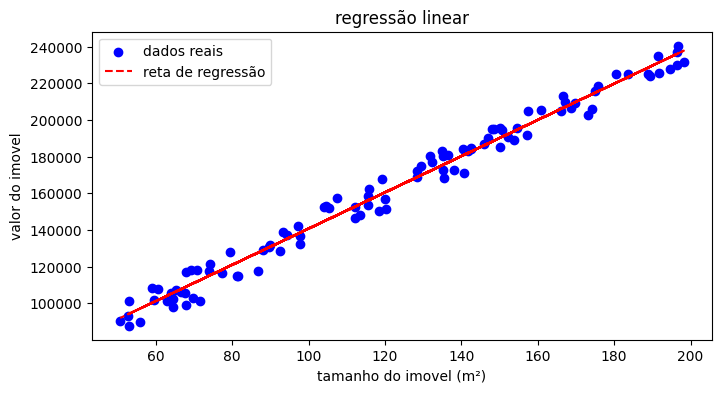

In [ ]:
#visualizar o resultado
plt.figure(figsize=(8, 4))
plt.scatter(df['tamanho_imovel'], df['valor_imovel'], label = 'dados reais', color='b')

#traçar a reta de regressão
z = np.polyfit(df['tamanho_imovel'], previsao, 1)
p = np.poly1d(z)
plt.plot(df['tamanho_imovel'], p(df['tamanho_imovel']), "r--", label='reta de regressão')

plt.xlabel('tamanho do imovel (m²)')
plt.ylabel('valor do imovel')
plt.title('regressão linear')
plt.legend()
plt.show()